<a href="https://colab.research.google.com/github/Taosif041/EMSC-497-Lab-4.-Neural-Networks-module/blob/main/ml_work_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK 2

#Neural network

In [308]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import plot_model
import matplotlib.pyplot as plt


In [309]:
# Load biodiversity data (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('/content/data_bio.csv')

# Define predictor variables (X) and target variable (y)
X = df[['JanMeanTem', 'JulyMeanTe', 'pptMean', 'seasMean', 'elevationM', 'elevationS', 'slopeMean', 'slopeStdev', 'lulcDecicu', 'lulcEvergr', 'lulcMixFor', 'lulcWater']]
y = df['bbsrich']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [310]:
# standardize the data
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std
X_test

,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,slopeMean,slopeStdev,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater
11654,1.557248,0.986639,1.722629,-1.343873,-1.049690,-0.734678,-0.734308,-0.743002,-0.412093,-0.069372,-0.252807,4.629074
9543,1.580833,-0.565158,-0.786201,-2.754015,-0.831659,0.599152,1.580833,1.394323,-0.412093,-0.313353,-0.489109,6.061275
2218,-1.136072,-0.835968,0.317724,0.877340,-0.362054,0.416528,0.619253,0.738225,-0.362230,-0.485366,3.247431,-0.081696
4308,0.013876,-0.061631,0.834752,-0.074635,-1.045497,-0.727028,-0.643968,-0.670903,-0.162317,-0.485366,-0.463574,4.730252
11668,1.226026,1.132140,-0.977228,-0.742772,0.199795,-0.160031,-0.272402,-0.396127,-0.412093,-0.485366,-0.489109,-0.250084
...,...,...,...,...,...,...,...,...,...,...,...,...
2404,-0.694701,-0.480023,0.306042,0.563954,-0.608038,-0.336919,-0.355086,-0.368089,1.046254,-0.485366,0.185750,-0.160398
5492,0.138150,0.152769,0.826871,-0.061154,-1.045497,-0.727028,-0.703174,-0.732588,-0.412093,-0.485366,-0.489109,2.841550
1705,-1.175336,-0.275406,-0.874617,1.430427,0.118732,-0.520500,-0.525047,-0.564358,-0.412093,-0.485366,-0.489109,-0.250084
9885,0.915667,1.159824,1.156410,-0.275926,-0.922505,-0.648624,-0.625594,-0.712560,-0.412093,-0.428014,3.159670,-0.250084


In [311]:
# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Training RMSE', 'Test RMSE', 'Training R2 Score', 'Test R2 Score'])


In [312]:
def reg_ANN_variation1():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Increase neurons in the first hidden layer
    model.add(layers.Dense(64, activation='relu'))  # Modify the second hidden layer
    model.add(layers.Dense(32, activation='relu'))  # Modify the third hidden layer
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [313]:
model1=reg_ANN_variation1()

model1.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 128)               1664      
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dense_70 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12033 (47.00 KB)
Trainable params: 12033 (47.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


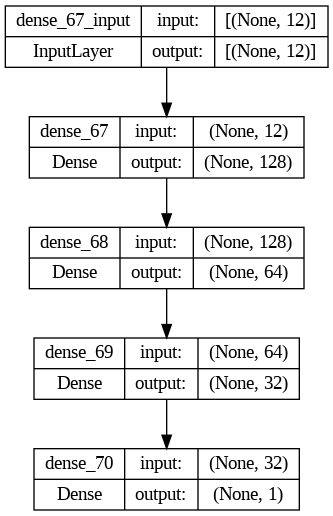

In [314]:
# visualize the model
plot_model(model1,show_shapes=True)

In [315]:
history1 = model1.fit(X_train, y_train, epochs=200, batch_size=32,  verbose=0, validation_split=0.1)

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


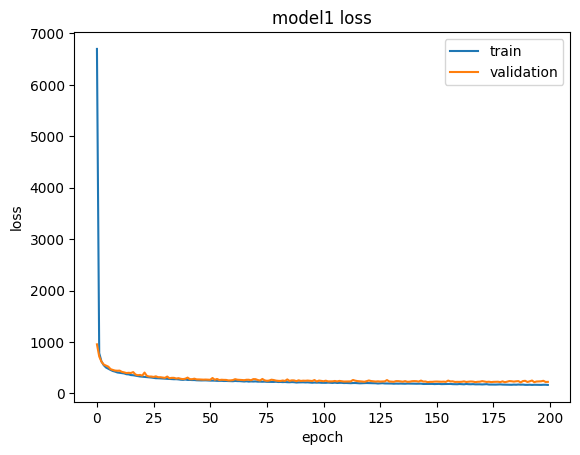

In [316]:
# plot the loss function variations over training epochs
print(history1.history.keys())
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [317]:
model1.evaluate(x=X_test, y=y_test, verbose=1)

116/116 [==============================] - 0s 2ms/step - loss: 211.4016 - mse: 211.4016


[211.40164184570312, 211.40164184570312]

In [318]:
# predict on test data

y_pred = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

270/270 [==============================] - 0s 2ms/step


In [319]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)


In [320]:
# Print evaluation metrics
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}\n")

Training RMSE: 13.198322958324582
Test RMSE: 14.539660470892235
Training R2 Score: 0.7987519224982785
Test R2 Score: 0.7614320688183771



In [321]:
 # Append results to the DataFrame
results_df = results_df.append({'Model': 'NN Variation1', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


<ipython-input-321-d0c0397b53b4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': 'NN Variation1', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


In [322]:
def reg_ANN_variation2():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [323]:
model2=reg_ANN_variation2()

model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 256)               3328      
                                                                 
 dense_72 (Dense)            (None, 128)               32896     
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 46593 (182.00 KB)
Trainable params: 46593 (182.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


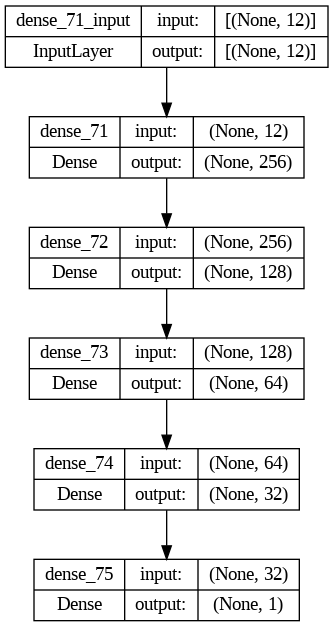

In [324]:
# visualize the model
plot_model(model2,show_shapes=True)

In [325]:
history2 = model2.fit(X_train, y_train, epochs=200, batch_size=32,  verbose=0, validation_split=0.1)

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


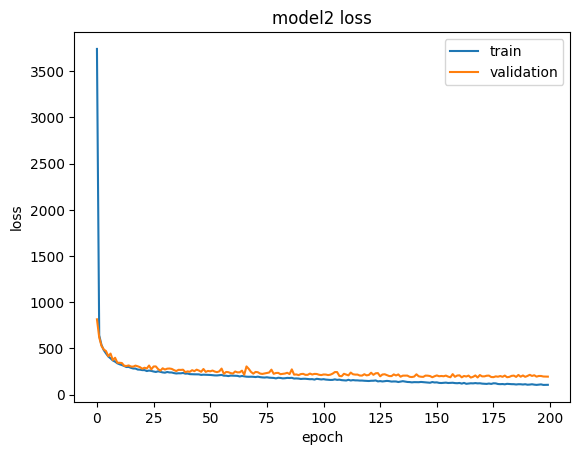

In [326]:
# plot the loss function variations over training epochs
print(history2.history.keys())
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [327]:
model2.evaluate(x=X_test, y=y_test, verbose=1)

116/116 [==============================] - 0s 2ms/step - loss: 175.2305 - mse: 175.2305


[175.2305450439453, 175.2305450439453]

In [328]:
# predict on test data

y_pred = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

270/270 [==============================] - 0s 2ms/step


In [329]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)


In [330]:
# Print evaluation metrics
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}\n")

Training RMSE: 10.296527907418119
Test RMSE: 13.237469259052009
Training R2 Score: 0.8775169930330263
Test R2 Score: 0.8022513790428119



In [331]:
 # Append results to the DataFrame
results_df = results_df.append({'Model': 'NN Variation2', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


<ipython-input-331-a1eb873f48c3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': 'NN Variation2', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


In [332]:
def reg_ANN_variation3():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model


In [333]:
model3=reg_ANN_variation3()

model3.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 512)               6656      
                                                                 
 dense_77 (Dense)            (None, 256)               131328    
                                                                 
 dense_78 (Dense)            (None, 128)               32896     
                                                                 
 dense_79 (Dense)            (None, 32)                4128      
                                                                 
 dense_80 (Dense)            (None, 1)                 33        
                                                                 
Total params: 175041 (683.75 KB)
Trainable params: 175041 (683.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


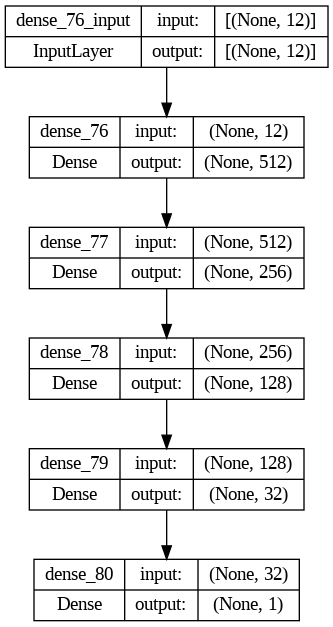

In [334]:
# visualize the model
plot_model(model3,show_shapes=True)

In [335]:
history3 = model3.fit(X_train, y_train, epochs=200, batch_size=32,  verbose=0, validation_split=0.1)

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


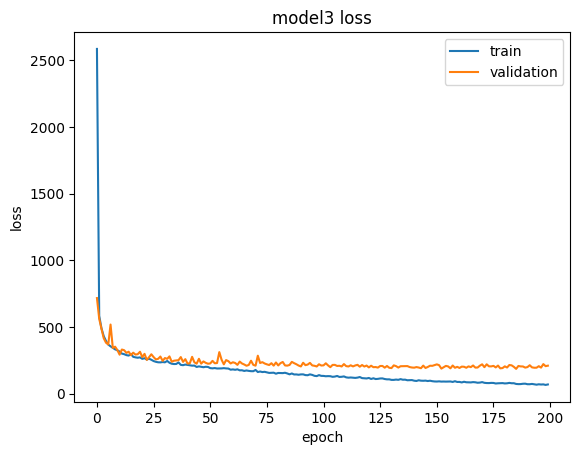

In [336]:
# plot the loss function variations over training epochs
print(history3.history.keys())
# "Loss"
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [337]:
model3.evaluate(x=X_test, y=y_test, verbose=1)

116/116 [==============================] - 0s 2ms/step - loss: 199.2536 - mse: 199.2536


[199.25364685058594, 199.25364685058594]

In [338]:
# predict on test data

y_pred = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

270/270 [==============================] - 1s 2ms/step


In [339]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)


In [340]:
# Print evaluation metrics
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}\n")

Training RMSE: 9.524493300514573
Test RMSE: 14.115721749718906
Training R2 Score: 0.8951959660274136
Test R2 Score: 0.7751412913318907



In [341]:
 # Append results to the DataFrame
results_df = results_df.append({'Model': 'NN Variation3', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


<ipython-input-341-233a3a140e99>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': 'NN Variation3', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


#Random forest

In [343]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import files

In [344]:
df = pd.read_csv('/content/data_bio.csv')
df.head()

,hexID,JanMeanTem,JulyMeanTe,pptMean,seasMean,elevationM,elevationS,lulcDecicu,lulcEvergr,lulcMixFor,lulcWater,slopeMean,slopeStdev,XCoord,YCoord,bbsrich
0,13554,-18.251,19.000,565.623,37.251,328,4.7,0.04945,0.00000,0.43681,0.10165,0.095,0.087,-95.086403,49.295887,193.725692
1,18789,-15.129,19.871,357.733,35.000,731,10.4,0.00000,0.00000,0.00000,0.00000,0.235,0.191,-104.658256,49.117530,88.408062
2,25367,-5.926,19.889,568.333,25.815,693,336.8,0.00000,0.09091,0.00000,0.00000,10.475,8.463,-119.670818,49.113730,202.459189
3,24503,-9.375,14.344,1150.842,23.719,1023,219.9,0.00000,1.00000,0.00000,0.00000,5.917,2.970,-117.371076,49.109173,185.113130
4,16185,-18.212,17.985,445.283,36.197,588,28.3,0.38182,0.00000,0.00000,0.00000,0.352,0.285,-99.760629,49.098623,179.614359


In [345]:
# Define predictor variables (X) and target variable (y)
X = df[['JanMeanTem', 'JulyMeanTe', 'pptMean', 'seasMean', 'elevationM', 'elevationS', 'slopeMean', 'slopeStdev', 'lulcDecicu', 'lulcEvergr', 'lulcMixFor', 'lulcWater']]
y = df['bbsrich']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [346]:
# Create a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [347]:
# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)


In [348]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [349]:
# Display the evaluation metrics
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")

Training RMSE: 4.910586200866972
Test RMSE: 12.709409706365541
Training R2 Score: 0.9721412955430676
Test R2 Score: 0.8177135889188034


In [350]:
 # Append results to the DataFrame
results_df = results_df.append({'Model': 'Random Forest', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


<ipython-input-350-a90e6df15fa0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': 'Random Forest', 'Training RMSE': train_rmse, 'Test RMSE': test_rmse, 'Training R2 Score': r2_train, 'Test R2 Score': r2_test}, ignore_index=True)


In [351]:
results_df

,Model,Training RMSE,Test RMSE,Training R2 Score,Test R2 Score
0,NN Variation1,13.198323,14.539660,0.798752,0.761432
1,NN Variation2,10.296528,13.237469,0.877517,0.802251
2,NN Variation3,9.524493,14.115722,0.895196,0.775141
3,Random Forest,4.910586,12.709410,0.972141,0.817714



# Overfitting Analysis:

1.  **NN Variation 1:**
    
    -   Training RMSE: 13.198323
    -   Test RMSE: 14.539660
    -   Training R2 Score: 0.798752
    -   Test R2 Score: 0.761432
    
    The model has a relatively high Training RMSE compared to Variation 2 and Variation 3, suggesting that it may not fit the training data as well. The R2 scores on both training and test sets are decent, but the difference between them could indicate a mild level of overfitting.
    
2.  **NN Variation 2:**
    
    -   Training RMSE: 10.296528
    -   Test RMSE: 13.237469
    -   Training R2 Score: 0.877517
    -   Test R2 Score: 0.802251
    
    Variation 2 has lower Training RMSE compared to Variation 1, and both the training and test R2 scores are high. This suggests that the model generalizes well to the test set. The model seems less prone to overfitting compared to Variation 1.
    
3.  **NN Variation 3:**
    
    -   Training RMSE: 9.524493
    -   Test RMSE: 14.115722
    -   Training R2 Score: 0.895196
    -   Test R2 Score: 0.775141
    
    This variation has the lowest Training RMSE and high R2 scores on both training and test sets, indicating good generalization. However, the larger difference between Training and Test R2 scores might suggest some overfitting.
    

### Random Forest Model:

-   Training RMSE: 4.910586
-   Test RMSE: 12.709410
-   Training R2 Score: 0.972141
-   Test R2 Score: 0.817714

The Random Forest model exhibits lower RMSE on both training and test sets compared to the neural network models. The high R2 scores on both sets indicate strong performance and generalization.

### Discussion on Neural Network vs. Random Forest:

**Advantages of Neural Network Models:**

-   Neural networks can capture complex relationships in data and learn intricate patterns.
-   Suitable for tasks with large datasets and high-dimensional input spaces.
-   Can automatically learn hierarchical features from the data.

**Disadvantages of Neural Network Models:**

-   Prone to overfitting, especially with complex architectures and insufficient data.
-   Computationally intensive and may require more resources for training.
-   The interpretability of neural networks is often challenging.

**Advantages of Random Forest Model:**

-   Robust and less prone to overfitting, especially with a large number of trees.
-   Handles non-linearity and interactions well.
-   Requires less preprocessing of data, and no need for feature scaling.

**Disadvantages of Random Forest Model:**

-   May not capture complex, non-linear relationships as effectively as neural networks.
-   Lack of interpretability compared to simpler models.

### Conclusion:

-   The Random Forest model appears to perform well with lower RMSE and high R2 scores on both training and test sets.
-   Neural network variations show decent performance, but there are indications of potential overfitting, especially in Variation 1 and Variation 3.
-   The choice between a neural network and a random forest depends on factors such as the size of the dataset, complexity of relationships, and computational resources available. If interpretability is crucial, a Random Forest might be preferred. If intricate patterns need to be captured, a carefully tuned neural network might be more suitable.